# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]
- 仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5]) 
- 仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8]) 

In [33]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

data_path = '/users/mac/downloads/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.shape

(891, 10)

In [35]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [36]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.254567
Ticket      0.166656
Name        0.135718
Fare        0.131727
Age         0.117408
Cabin       0.067542
Pclass      0.062309
SibSp       0.026434
Parch       0.024048
Embarked    0.013592
dtype: float64

## 先用隨機森林對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [37]:
len(feats)

10

In [38]:
high_feature=list(feats[:5].index)

In [39]:
# 高重要性特徵 + 隨機森林
"""
Your Code Here
"""
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8069337506698201

In [40]:
# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8171282086200128

正確率下降約0.2%

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

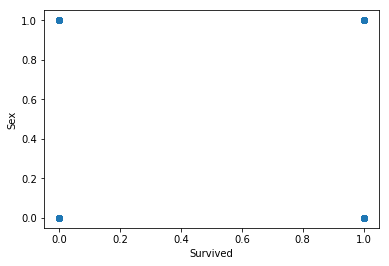

In [41]:
# 觀察重要特徵與目標的分布
# 第一名              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=train_Y, y=df['Sex'], fit_reg=False)
plt.show()

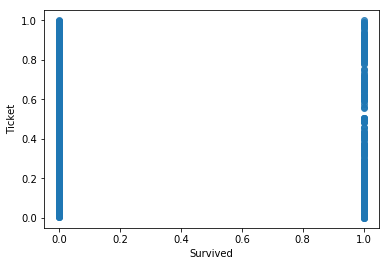

In [42]:
# 第二名       
sns.regplot(x=train_Y, y=df['Ticket'], fit_reg=False)
plt.show()

In [47]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [46]:
df1.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket_x', 'Fare',
       'Cabin', 'Embarked', 'Ticket_y'],
      dtype='object')

In [51]:
df["Ticket"]

0      0.769118
1      0.876471
2      0.983824
3      0.072059
4      0.694118
5      0.404412
6      0.125000
7      0.580882
8      0.505882
9      0.194118
10     0.905882
11     0.055882
12     0.786765
13     0.489706
14     0.607353
15     0.225000
16     0.705882
17     0.222059
18     0.442647
19     0.270588
20     0.204412
21     0.223529
22     0.408824
23     0.061765
24     0.580882
25     0.483824
26     0.263235
27     0.139706
28     0.416176
29     0.532353
         ...   
861    0.325000
862    0.129412
863    0.835294
864    0.176471
865    0.185294
866    0.929412
867    0.867647
868    0.454412
869    0.505882
870    0.569118
871    0.079412
872    0.738235
873    0.445588
874    0.845588
875    0.286765
876    0.741176
877    0.526471
878    0.533824
879    0.086765
880    0.169118
881    0.579412
882    0.747059
883    0.830882
884    0.955882
885    0.705882
886    0.148529
887    0.020588
888    0.992647
889    0.011765
890    0.685294
Name: Ticket, Length: 89

In [50]:
df1[["Ticket_x","Ticket_y"]]

,Ticket_x,Ticket_y
0,0.769118,0.510766
1,0.876471,0.474077
2,0.983824,0.474077
3,0.072059,0.474077
4,0.694118,0.510766
5,0.404412,0.510766
6,0.125000,0.510766
7,0.580882,0.510766
8,0.505882,0.474077
9,0.194118,0.474077


In [43]:
# 製作新特徵看效果
"""
Your Code Here
"""
#ticket mean by sex
temp=df.groupby(["Sex"])["Ticket"].mean().reset_index()
df1=pd.merge(df,temp,on=["Sex"],how='left')
df1.drop(["Ticket_x"],axis=1)
train_X = MMEncoder.fit_transform(df1)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

KeyError: "['Ticket'] not found in axis"

準確率下降0.2%